# Optimizing Air Travel: A Data-Driven Approach to Flight Delay Analysis and Prediction
## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Airline_Delay_Cause.csv")

In [5]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

# Data Preproccessing

In [8]:
original_df=df.copy() #Storing original dataset

In [10]:
# Remove unnecessary Columns
df.drop(['year','carrier_name','airport_name'],axis = 1,inplace = True)
df

,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,12,9E,ABE,72.0,5.0,2.46,1.00,0.73,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,12,9E,AEX,62.0,7.0,4.25,0.00,1.00,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,12,9E,AGS,95.0,10.0,5.94,0.00,1.06,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,12,9E,ALB,23.0,2.0,0.56,0.00,0.00,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,12,9E,ATL,2111.0,256.0,76.88,8.75,52.43,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,1,WN,ONT,892.0,184.0,59.21,2.61,22.41,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
179334,1,WN,ORF,151.0,45.0,18.00,2.01,7.19,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
179335,1,WN,PBI,251.0,68.0,25.17,0.08,14.92,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
179336,1,WN,PDX,793.0,173.0,64.00,1.27,21.12,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


In [21]:
#replacing carrier and airport with their freq counts 
df['carrier_freq'] = df['carrier'].map(df['carrier'].value_counts())
df['airport_freq'] = df['airport'].map(df['airport'].value_counts())   
df.drop(['carrier','airport'],axis = 1,inplace=True)
df.head()


,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_freq,airport_freq
0,12,72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,7494,563
1,12,62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,7494,274
2,12,95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,7494,448
3,12,23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,7494,1290
4,12,2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,7494,1413


In [14]:
df.tail()

,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_encoded,airport_encoded
179333,1,892.0,184.0,59.21,2.61,22.41,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0,10051,890
179334,1,151.0,45.0,18.00,2.01,7.19,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0,10051,1330
179335,1,251.0,68.0,25.17,0.08,14.92,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0,10051,955
179336,1,793.0,173.0,64.00,1.27,21.12,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0,10051,1254
179337,1,773.0,172.0,45.62,13.62,47.08,0.00,65.67,50.0,3.0,9475.0,2818.0,890.0,2352.0,0.0,3415.0,10051,1445


# Missing Values

In [17]:
100*(df.isnull().sum())/len(df)

month                  0.000000
arr_flights            0.190144
arr_del15              0.329545
carrier_ct             0.190144
weather_ct             0.190144
nas_ct                 0.190144
security_ct            0.190144
late_aircraft_ct       0.190144
arr_cancelled          0.190144
arr_diverted           0.190144
arr_delay              0.190144
carrier_delay          0.190144
weather_delay          0.190144
nas_delay              0.190144
security_delay         0.190144
late_aircraft_delay    0.190144
carrier_encoded        0.000000
airport_encoded        0.000000
dtype: float64

In [18]:
## We can observe a pattern where all the columns have same percent of missing values except 1 so maybe they all are in same rows so we will 
## check it and if it is like that then it will easy to simply drop those rows 

In [22]:
missing_index = {
    column : set(df[df[column].isnull()].index)
    for column in df.columns
    if df[column].isnull().sum() > 0
}
common_missing_rows = set.intersection(*missing_index.values())

print(f"Rows with missing values in all columns where value is missing: {len(common_missing_rows)}")


Rows with missing values in all columns where value is missing: 341


In [24]:
missing_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

missing_index = {
    column: set(df[df[column].isnull()].index)
    for column in missing_columns
}

missing_rows = set.intersection(*missing_index.values())
df = df.drop(index=missing_rows)

In [25]:
df.isnull().sum()

month                    0
arr_flights              0
arr_del15              250
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_aircraft_ct         0
arr_cancelled            0
arr_diverted             0
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
carrier_freq             0
airport_freq             0
dtype: int64

In [26]:
# Still missing values in arr_del15 so will replace them with median 
df['arr_del15'].fillna(df['arr_del15'].median(), inplace=True)

In [28]:
# Final check 
df.isnull().sum()

month                  0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
carrier_freq           0
airport_freq           0
dtype: int64

In [30]:
df['airport'] = original_df['airport']
df['carrier'] = original_df['carrier']

In [36]:
df=df[df["airport_freq"]!=1]
df = df.reset_index(drop=True)
# I am removing those airports whose count is 1 

In [38]:
def groupwise_outliers(data, features, group_by):
    def within_group(sub_df, feature):
        q1 = sub_df[feature].quantile(0.25)
        q3 = sub_df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        sub_df[feature] = sub_df[feature].clip(lower_bound, upper_bound)
        return sub_df

    result_df = data.copy()
    for feature in features:
        result_df = (
            result_df
            .groupby(group_by, group_keys=False)
            .apply(lambda grp: within_group(grp, feature))
        )
    return result_df

# Features to cap outliers for
features_to_process = [
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay'
]

# Apply groupwise outlier capping
df_cleaned = groupwise_outliers(df, features_to_process, group_by='airport')


In [39]:
# Define weights for each contributing factor
weights = {
    'carrier_delay': 0.5,
    'late_aircraft_ct': 0.3,
    'weather_delay': 0.1,
    'nas_delay': 0.1,
    'arr_cancelled': 0.1
}

# Compute weighted OAI score
df['OAI'] = sum(df[col] * weight for col, weight in weights.items())


# We will start with EDA Now 

In [96]:
df['delay_rate'] = df['arr_del15']/df['arr_flights']
df['is_delay'] = (df['delay_rate']>.15).astype(int)
df['delay_rate'].describe()

count    178995.000000
mean          0.190484
std           0.372197
min           0.000000
25%           0.105263
50%           0.166667
75%           0.238095
max          15.000000
Name: delay_rate, dtype: float64

In [64]:
def summarize_by_airport(df):
    summary = df.groupby('airport').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum',
        'arr_cancelled': 'sum',
        'arr_diverted': 'sum',
        'carrier_delay': 'mean',
        'weather_delay': 'mean',
        'nas_delay': 'mean',
        'security_delay': 'mean',
        'late_aircraft_delay': 'mean'
    }).round(2)

    # Derived metrics
    summary['delay_rate'] = (summary['arr_del15'] / summary['arr_flights'] * 100).round(2)
    summary['cancellation_rate'] = (summary['arr_cancelled'] / summary['arr_flights'] * 100).round(2)

    # Optional: Add average delay metric
    summary['avg_delay'] = summary[[
        'carrier_delay', 'weather_delay', 'nas_delay',
        'security_delay', 'late_aircraft_delay'
    ]].mean(axis=1)

    # You can compute std, max, median only if you have raw delay data per flight — which this aggregation doesn't have
    summary['delay_volatility'] = summary[['carrier_delay', 'weather_delay', 'nas_delay']].std(axis=1)

    # Size buckets
    summary['airport_scale'] = pd.cut(summary['arr_flights'], bins=3, labels=['Small', 'Medium', 'Large'])

    return summary.reset_index()


In [65]:
def assign_risk_flag(df_airport):
    dr_thresh = df_airport['delay_rate'].quantile(0.75)
    ad_thresh = df_airport['avg_delay'].quantile(0.75)
    cn_thresh = df_airport['cancellation_rate'].quantile(0.80)
    
    print("Thresholds used:")
    print(f"• Delay rate > {dr_thresh:.1f}%")
    print(f"• Average delay > {ad_thresh:.1f} min")
    print(f"• Cancellation rate > {cn_thresh:.1f}%")
    
    flag = (
        ((df_airport['delay_rate'] > dr_thresh) & (df_airport['avg_delay'] > ad_thresh)) |
        (df_airport['cancellation_rate'] > cn_thresh)
    )
    
    df_airport['high_delay_flag'] = flag.astype(int)
    return df_airport


In [66]:
def get_classification_features(df_airport):
    cols = [
        'arr_flights',
        'avg_delay',
        'carrier_delay',
        'weather_delay',
        'nas_delay',
        'security_delay',
        'late_aircraft_delay',
        'delay_rate',
        'cancellation_rate'
    ]

    X = df_airport[cols].copy()
    y = df_airport['high_delay_flag'].copy()

    X = X.fillna(X.mean())

    return X, y, cols


In [67]:
def plot_airport_metrics(df_airport):
    plt.figure(figsize=(15, 10))

    # Risk label distribution
    plt.subplot(2, 3, 1)
    df_airport['high_delay_flag'].value_counts().plot(kind='bar')
    plt.title("High Delay Flag Distribution")
    plt.xlabel("High Delay Risk (0 = No, 1 = Yes)")
    plt.ylabel("Airports")

    # Delay rate histogram
    plt.subplot(2, 3, 2)
    plt.hist(df_airport['delay_rate'], bins=20, color='skyblue')
    plt.title("Delay Rate Distribution")
    plt.xlabel("Delay Rate (%)")
    plt.ylabel("Frequency")

    # Delay risk by size
    plt.subplot(2, 3, 3)
    df_airport.groupby('airport_scale',observed=True)['high_delay_flag'].mean().plot(kind='bar', color='coral')
    plt.title("High Risk % by Airport Size")
    plt.ylabel("Proportion")

    # Top delay rate airports
    plt.subplot(2, 3, 4)
    top_delay = df_airport.nlargest(10, 'delay_rate')
    plt.barh(top_delay['airport'], top_delay['delay_rate'], color='salmon')
    plt.xlabel("Delay Rate (%)")
    plt.title("Top 10 Airports by Delay Rate")

    plt.tight_layout()
    plt.show()


In [68]:
def run_airport_delay_analysis(df):
    print("1️ Aggregating data by airport...")
    grouped_df = summarize_by_airport(df)

    print("2️ Labeling high-risk airports...")
    grouped_df = assign_risk_flag(grouped_df)

    print("3️ Extracting features...")
    X, y, feature_names = get_classification_features(grouped_df)

    print(f"\n Stats:")
    print(f"Total airports: {len(grouped_df)}")
    print(f"High delay airports: {y.sum()} ({y.mean()*100:.1f}%)")

    print("\n Generating plots...")
    plot_airport_metrics(grouped_df)

    # Additional airport-level insights
    risky = grouped_df[grouped_df['high_delay_flag'] == 1]
    safe = grouped_df[grouped_df['high_delay_flag'] == 0]

    print("\n High Delay Airports Summary:")
    print(f"• Avg delay rate: {risky['delay_rate'].mean():.1f}%")
    print(f"• Avg delay time: {risky['avg_delay'].mean():.1f} min")
    print(f"• Avg cancellation: {risky['cancellation_rate'].mean():.1f}%")

    print("\n Reliable Airports Summary:")
    print(f"• Avg delay rate: {safe['delay_rate'].mean():.1f}%")
    print(f"• Avg delay time: {safe['avg_delay'].mean():.1f} min")
    print(f"• Avg cancellation: {safe['cancellation_rate'].mean():.1f}%")

    print("\n Most Problematic Airports:")
    for idx, row in risky.nlargest(5, 'delay_rate').iterrows():
        print(f"{row['airport']} → {row['delay_rate']:.1f}% delay, {row['avg_delay']:.0f} min, {row['cancellation_rate']:.1f}% cancelled")

    print("\n Most Reliable Airports:")
    for idx, row in safe.nsmallest(5, 'delay_rate').iterrows():
        print(f"{row['airport']} → {row['delay_rate']:.1f}% delay, {row['avg_delay']:.0f} min, {row['cancellation_rate']:.1f}% cancelled")

    return grouped_df


1️ Aggregating data by airport...
2️ Labeling high-risk airports...
Thresholds used:
• Delay rate > 18.5%
• Average delay > 251.1 min
• Cancellation rate > 2.6%
3️ Extracting features...

 Stats:
Total airports: 391
High delay airports: 110 (28.1%)

 Generating plots...


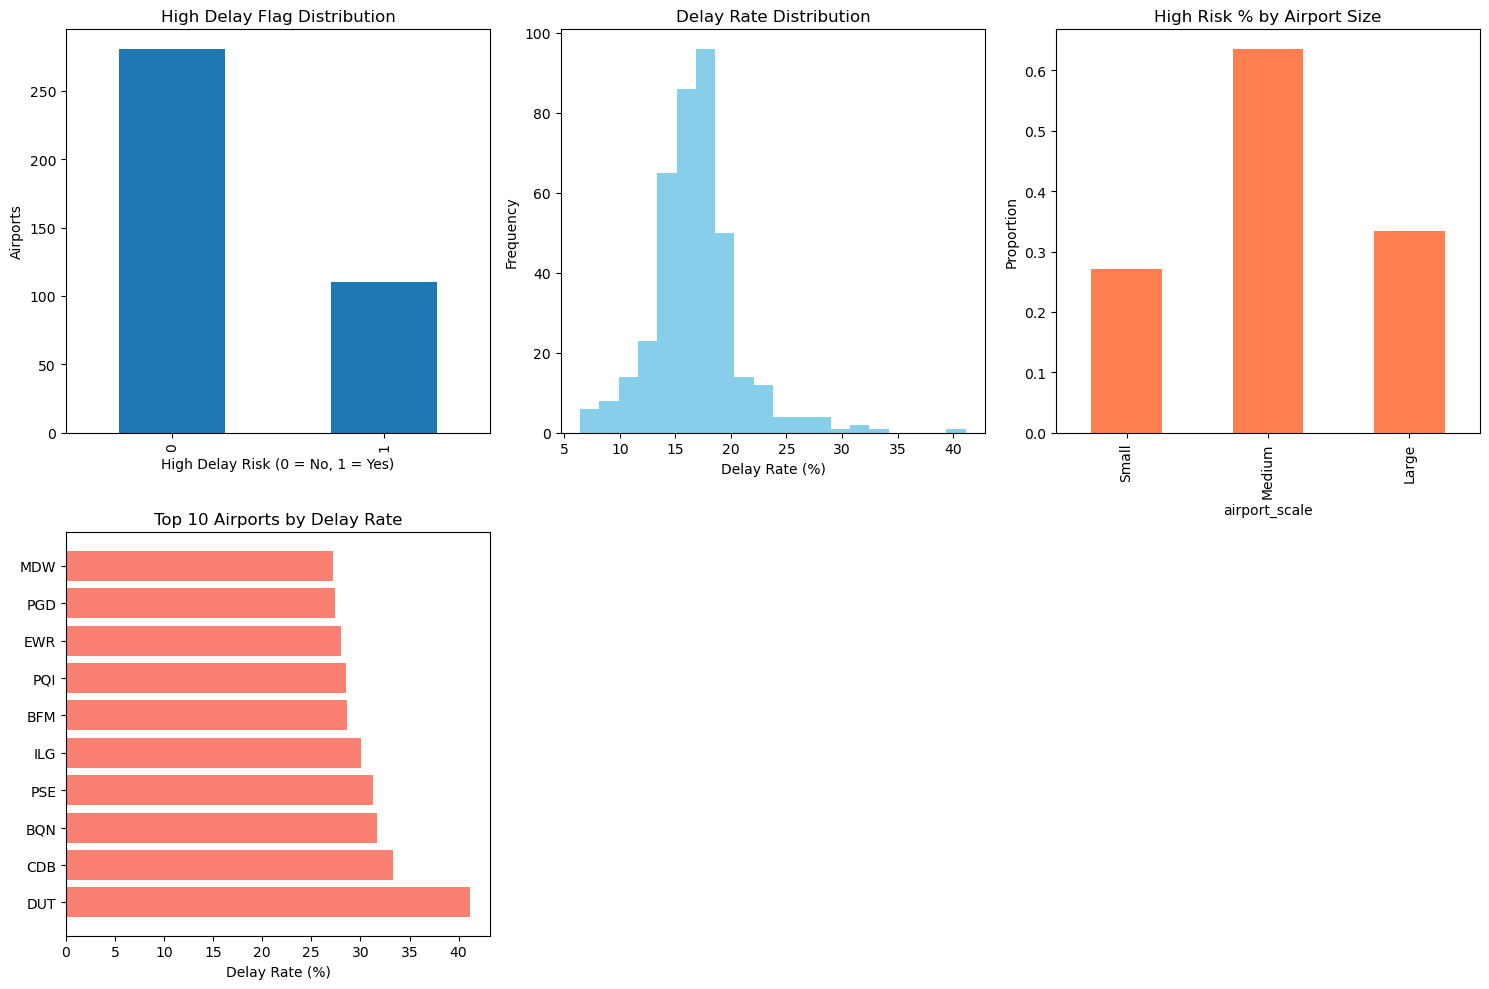


 High Delay Airports Summary:
• Avg delay rate: 18.6%
• Avg delay time: 523.0 min
• Avg cancellation: 3.3%

 Reliable Airports Summary:
• Avg delay rate: 16.2%
• Avg delay time: 261.7 min
• Avg cancellation: 1.4%

 Most Problematic Airports:
DUT → 41.1% delay, 297 min, 13.6% cancelled
CDB → 33.3% delay, 40 min, 3.3% cancelled
ILG → 30.0% delay, 43 min, 3.6% cancelled
BFM → 28.7% delay, 37 min, 4.7% cancelled
PQI → 28.5% delay, 230 min, 6.8% cancelled

 Most Reliable Airports:
ROP → 6.6% delay, 7 min, 0.0% cancelled
EKO → 7.2% delay, 31 min, 0.0% cancelled
SPN → 7.2% delay, 20 min, 0.0% cancelled
BTM → 7.4% delay, 46 min, 0.8% cancelled
LWS → 8.1% delay, 49 min, 0.0% cancelled


In [69]:
airport_summary = run_airport_delay_analysis(df_cleaned)


In [79]:
def compute_monthly_metrics(df):
    # Step 1: Aggregate monthly data
    monthly = df.groupby('month').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum',
        'arr_cancelled': 'sum',
        'arr_diverted': 'sum',
        'carrier_delay': 'mean',
        'weather_delay': 'mean',
        'nas_delay': 'mean',
        'security_delay': 'mean',
        'late_aircraft_delay': 'mean'
    }).round(2)

    # Step 2: Rename columns manually to avoid MultiIndex issues
    monthly.columns = [
        'total_flights', 'total_delayed', 'total_cancelled', 'total_diverted',
        'avg_carrier_delay', 'avg_weather_delay', 'avg_nas_delay',
        'avg_security_delay', 'avg_late_aircraft_delay'
    ]

    # Step 3: Calculate delay percentage
    monthly['delay_percentage'] = (
        monthly['total_delayed'] / monthly['total_flights'] * 100
    ).round(2)

    # Step 4: Reset index to expose 'month' as a column
    monthly = monthly.reset_index()

    # Step 5: Add season label for each month
    def assign_season(m):
        if m in [12, 1, 2]:
            return 'Winter'
        elif m in [3, 4, 5]:
            return 'Spring'
        elif m in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    monthly['season'] = monthly['month'].apply(assign_season)

    return monthly


In [80]:
#  Generate monthly insights from cleaned dataset
monthly_trends = compute_monthly_metrics(df_cleaned)

#  Inspect the output
monthly_trends.head()


,month,total_flights,total_delayed,total_cancelled,total_diverted,avg_carrier_delay,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay,delay_percentage,season
0,1,3880194.62,704596.00,72226.62,5670.12,1028.14,132.14,636.69,1.50,1048.56,18.16,Winter
1,2,3662008.62,677556.25,68182.62,5528.00,982.03,139.08,638.75,1.41,1042.91,18.50,Winter
2,3,4137214.00,708668.38,71844.62,5799.75,1013.44,100.94,618.12,1.49,1056.11,17.13,Spring
3,4,3783118.12,639723.62,62644.62,5541.50,962.24,112.01,600.22,1.39,1019.30,16.91,Spring
4,5,3796223.75,671102.88,41300.75,6172.62,1005.19,129.38,616.65,1.48,1092.46,17.68,Spring


In [84]:
def plot_monthly_seasonal_trends(monthly_df):
    plt.figure(figsize=(10, 8))

    # Monthly Delay Plot
    plt.subplot(2, 1, 1)
    sorted_df = monthly_df.sort_values('month')
    plt.plot(sorted_df['month'], sorted_df['delay_percentage'],
             marker='s', linestyle='-', color='navy', linewidth=2, markersize=7)
    plt.title('Monthly Flight Delay Percentage', fontsize=13, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Delay %')
    plt.grid(True)
    plt.xticks(range(1, 13))

    # Seasonal Average Delay Plot
    plt.subplot(2, 1, 2)
    seasonal_avg = monthly_df.groupby('season')['delay_percentage'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
    plt.bar(seasonal_avg.index, seasonal_avg.values, color='teal', edgecolor='black')
    plt.title('Average Seasonal Delay Percentage', fontsize=13, fontweight='bold')
    plt.ylabel('Avg Delay %')
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()


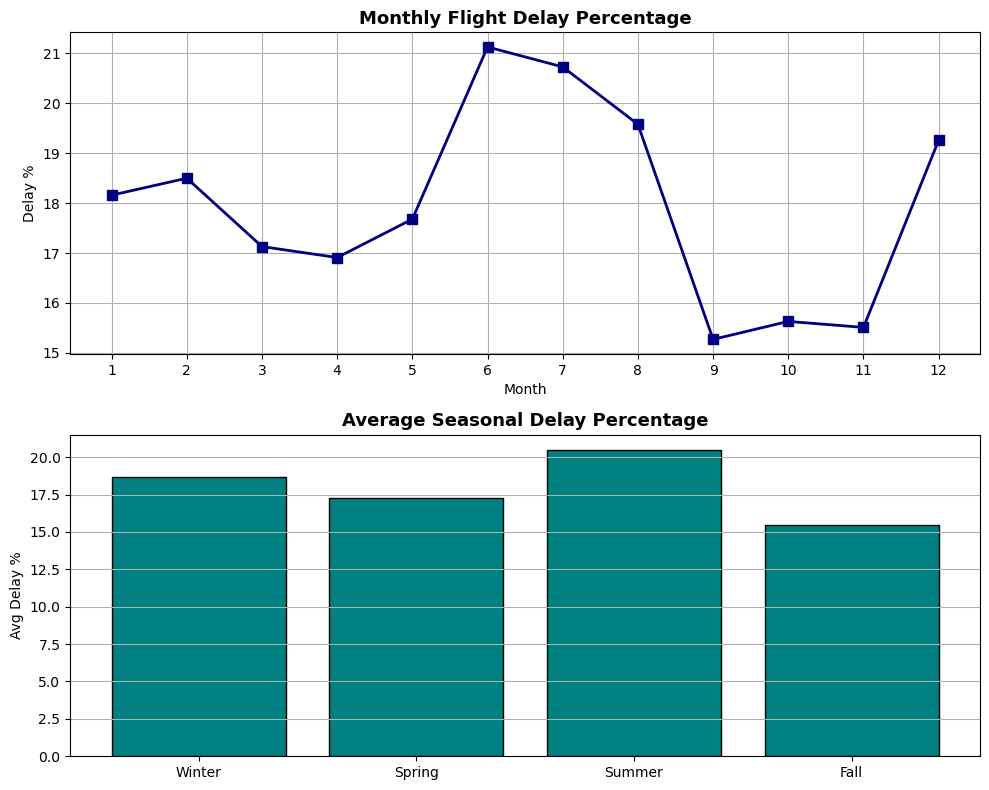

In [85]:
# 🖼 Show monthly and seasonal delay graphs
plot_monthly_seasonal_trends(monthly_trends)


In [88]:
#  Overall Arrival Index (OAI)
df_cleaned['OAI'] = (
    df_cleaned['carrier_delay'] +
    df_cleaned['weather_delay'] +
    df_cleaned['nas_delay'] +
    df_cleaned['security_delay'] +
    df_cleaned['late_aircraft_delay']
)


In [89]:
# Generate key summary statistics for each airline carrier

def summarize_carrier_performance(df):
    grouped = df.groupby('carrier').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum',
        'arr_cancelled': 'sum',
        'arr_diverted': 'sum',
        'OAI': ['mean', 'std', 'max', 'min', 'median'],
        'carrier_delay': 'mean',
        'weather_delay': 'mean',
        'nas_delay': 'mean',
        'security_delay': 'mean',
        'late_aircraft_delay': 'mean'
    }).round(2)
    
    # Flatten multi-level columns
    grouped.columns = [
        f"{col[0]}_{col[1]}" if col[1] else col[0]
        for col in grouped.columns
    ]
    
    # Derive additional performance metrics
    grouped['delay_rate'] = (grouped['arr_del15_sum'] / grouped['arr_flights_sum'] * 100).round(2)
    grouped['cancellation_rate'] = (grouped['arr_cancelled_sum'] / grouped['arr_flights_sum'] * 100).round(2)
    grouped['avg_delay_minutes'] = grouped['OAI_mean']
    grouped['delay_variability'] = grouped['OAI_std']
    grouped['worst_delay'] = grouped['OAI_max']
    grouped['controlable_median_delay_minutes'] = grouped['OAI_median']
    
    return grouped.reset_index()


In [91]:
#  Apply summary function on the cleaned dataset
carrier_summary_df = summarize_carrier_performance(df_cleaned)

# Preview top few rows
carrier_summary_df.head()


,carrier,arr_flights_sum,arr_del15_sum,arr_cancelled_sum,arr_diverted_sum,OAI_mean,OAI_std,OAI_max,OAI_min,OAI_median,...,weather_delay_mean,nas_delay_mean,security_delay_mean,late_aircraft_delay_mean,delay_rate,cancellation_rate,avg_delay_minutes,delay_variability,worst_delay,controlable_median_delay_minutes
0,9E,1346009.38,188831.00,18926.25,1361.50,1773.40,4909.16,48716.00,0.0,533.0,...,87.57,438.82,0.15,652.50,14.03,1.41,1773.40,4909.16,48716.00,533.0
1,9K,1034.00,107.00,0.00,0.00,321.63,278.02,1013.50,17.0,330.0,...,0.00,31.53,0.00,105.70,10.35,0.00,321.63,278.02,1013.50,330.0
2,AA,5346180.62,1040468.50,73111.50,9494.50,6020.02,10273.98,88005.75,0.0,2330.5,...,272.44,1246.90,5.17,2298.68,19.46,1.37,6020.02,10273.98,88005.75,2330.5
3,AS,1630080.38,263172.38,15678.50,3492.62,1667.58,4166.57,45537.38,0.0,475.0,...,55.76,492.70,2.97,563.39,16.14,0.96,1667.58,4166.57,45537.38,475.0
4,AX,178173.50,43621.00,6023.50,362.50,1817.03,5174.33,61662.50,0.0,703.0,...,60.04,327.64,0.01,870.75,24.48,3.38,1817.03,5174.33,61662.50,703.0


In [94]:
# 📊 Refreshed visual insights for carrier performance
def visualize_carrier_insights(carrier_df):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20, 15))

    # 1️ Mean OAI by Carrier (horizontal)
    plt.subplot(3, 1, 1)
    sorted_oai = carrier_df.sort_values('OAI_mean', ascending=True)
    plt.barh(sorted_oai['carrier'], sorted_oai['OAI_mean'], 
             color='#0077b6', alpha=0.8)
    plt.title('📌 Mean Overall Arrival Index (OAI) by Carrier', fontsize=13, fontweight='bold')
    plt.xlabel('Mean OAI')
    plt.ylabel('Carrier')
    plt.grid(True, linestyle='--', alpha=0.3)

    # 2️ Delay Causes by Carrier (grouped bar)
    plt.subplot(3, 1, 2)
    delay_columns = ['carrier_delay_mean', 'weather_delay_mean', 'nas_delay_mean',
                     'security_delay_mean', 'late_aircraft_delay_mean']
    delay_labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
    colors = ['#f94144', '#f3722c', '#f9844a', '#f9c74f', '#90be6d']
    
    x = range(len(carrier_df))
    width = 0.15

    for i, (col, label, color) in enumerate(zip(delay_columns, delay_labels, colors)):
        plt.bar([pos + width * i for pos in x], carrier_df[col], 
                width=width, label=label, color=color, alpha=0.85)

    plt.title(' Mean Delay Causes by Carrier', fontsize=13, fontweight='bold')
    plt.xlabel('Carrier')
    plt.ylabel('Mean Delay (min)')
    plt.xticks([pos + width * 2 for pos in x], carrier_df['carrier'], rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.3)

    # 3️ Delay Rate by Carrier
    plt.subplot(3, 1, 3)
    sorted_by_delay = carrier_df.sort_values('delay_rate', ascending=False)
    plt.bar(sorted_by_delay['carrier'], sorted_by_delay['delay_rate'],
            color='#4361ee', alpha=0.8)
    plt.title(' Delay Rate by Carrier', fontsize=13, fontweight='bold')
    plt.xlabel('Carrier')
    plt.ylabel('Delay Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


C:\Users\hy787\AppData\Local\Temp\ipykernel_33376\2073377921.py:49: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
C:\Users\hy787\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


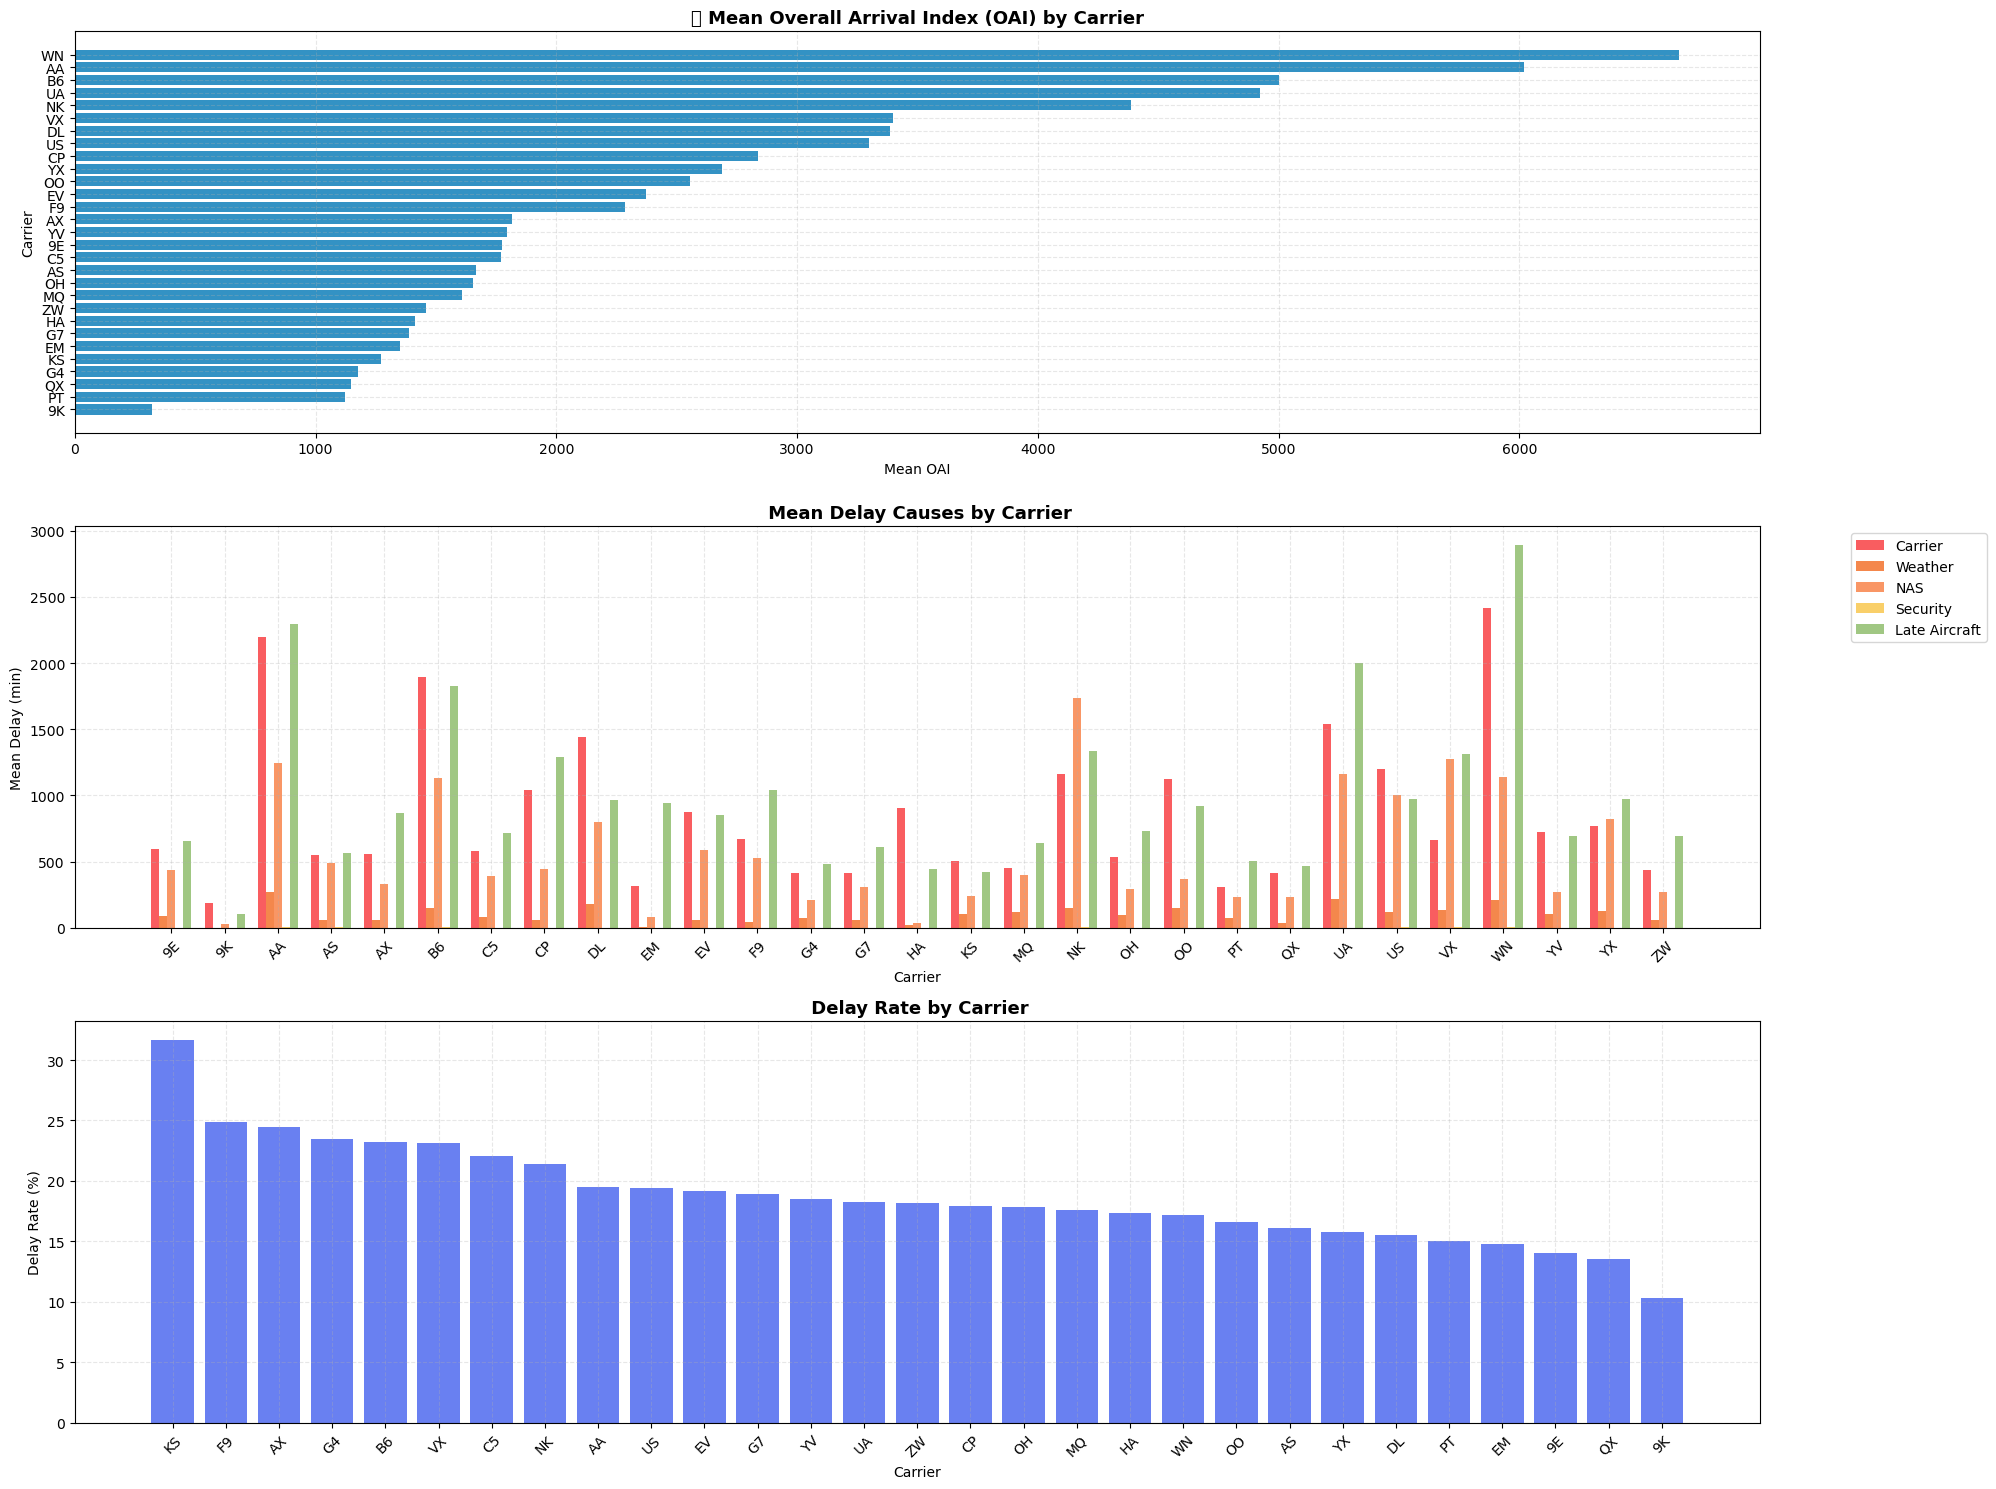

In [95]:
#  Generate charts
visualize_carrier_insights(carrier_summary_df)


# Now we will Build a classification model to predict delays 
### we will train a XGBoost classifier

In [97]:
# Core modeling and evaluation imports
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, fbeta_score, classification_report


In [100]:
# Set of informative features based on prior analysis
selected_features = [
    'month',
    'arr_flights',
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'late_aircraft_ct',
    'arr_cancelled',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'carrier_freq',
    'airport_freq'
]

# Define X and y
X = df[selected_features]
y = df['is_delay']


In [101]:
# Splitting with stratified sampling for balanced label distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [102]:
# XGBoost model configuration based on optimized parameters
xgb_model = XGBClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    colsample_bytree=0.8,
    reg_alpha=5,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
# Fit model to the training set
xgb_model.fit(X_train, y_train)
# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)

# Print evaluation metrics
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"F2 Score: {fbeta_score(y_test, y_pred_xgb, beta=2):.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


C:\Users\hy787\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:56:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 Score: 0.8569
F2 Score: 0.8868

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.72      0.78     15402
           1       0.81      0.91      0.86     20397

    accuracy                           0.83     35799
   macro avg       0.83      0.81      0.82     35799
weighted avg       0.83      0.83      0.82     35799



In [104]:
# Combine feature names with importances
importance_values = xgb_model.feature_importances_
feature_rank = list(zip(selected_features, importance_values))
feature_rank.sort(key=lambda x: x[1], reverse=True)

# Contextual descriptions for each feature
feature_explanations = {
    'month': 'Seasonality impact',
    'arr_flights': 'Flight volume on that route',
    'carrier_ct': 'Carrier-caused delay frequency',
    'weather_ct': 'Delays due to adverse weather',
    'nas_ct': 'Air traffic system-related delays',
    'late_aircraft_ct': 'Delays due to inbound aircraft',
    'arr_cancelled': 'Number of cancellations',
    'carrier_delay': 'Delay time due to carrier issues',
    'weather_delay': 'Time lost to weather',
    'nas_delay': 'Minutes delayed by NAS',
    'carrier_encoded': 'Carrier encoded numerically',
    'airport_encoded': 'Airport encoded numerically'
}
# Present key contributing features with human-readable insights
print(" Top Influencing Factors for Delay Classification:\n")
for idx, (feat, score) in enumerate(feature_rank, 1):
    context = feature_explanations.get(feat, "Operational feature")
    print(f"{idx}. {feat.replace('_', ' ').capitalize()} ({score * 100:.1f}%) - {context}")


 Top Influencing Factors for Delay Classification:

1. Late aircraft ct (31.7%) - Delays due to inbound aircraft
2. Nas delay (17.1%) - Minutes delayed by NAS
3. Arr flights (13.4%) - Flight volume on that route
4. Carrier delay (10.6%) - Delay time due to carrier issues
5. Carrier ct (9.5%) - Carrier-caused delay frequency
6. Nas ct (5.0%) - Air traffic system-related delays
7. Carrier freq (4.9%) - Operational feature
8. Month (4.7%) - Seasonality impact
9. Arr cancelled (3.1%) - Number of cancellations
10. Weather ct (0.0%) - Delays due to adverse weather
11. Weather delay (0.0%) - Time lost to weather
12. Airport freq (0.0%) - Operational feature


# Evalute with ROC and AUC 

ROC-AUC Score: 0.8959


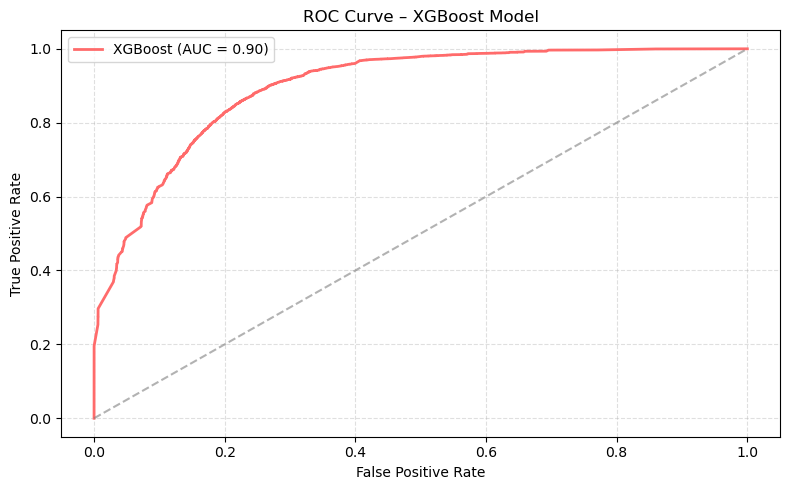

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='#ff6b6b', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost Model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Intrepreting with SHAP

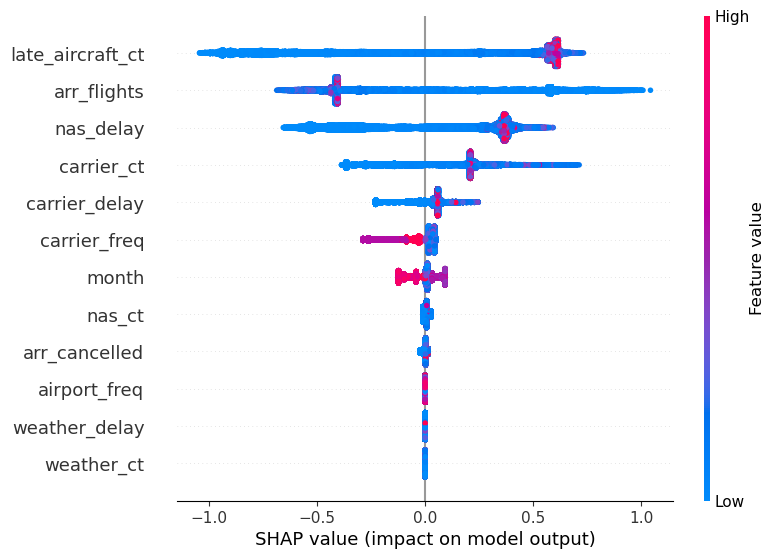

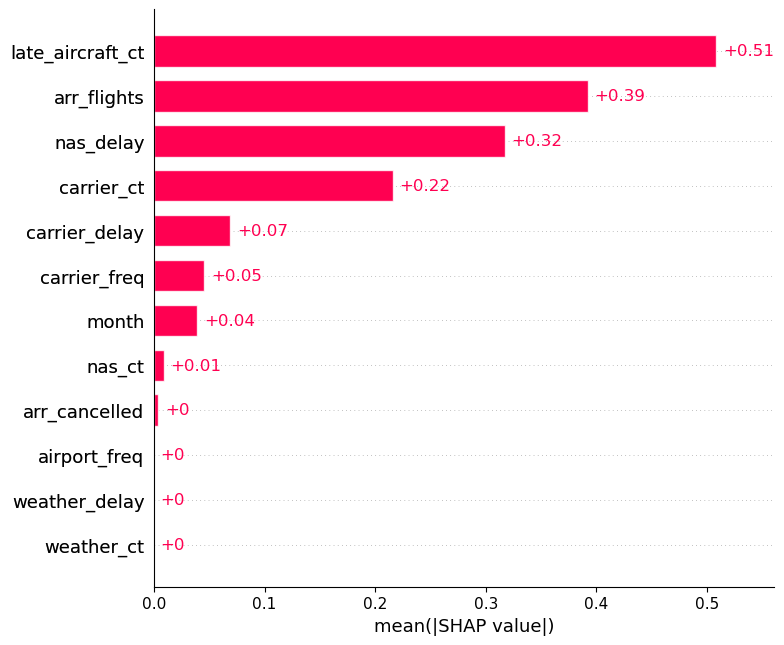

In [112]:
import shap

# Create an explainer tailored to your trained XGBoost model
explainer = shap.Explainer(xgb_model)
# Derive SHAP values for the test features
shap_vals = explainer(X_test)
# Show how each feature is influencing predictions across samples
shap.plots.beeswarm(shap_vals, max_display=12)
# Show average impact of each feature on the model’s output
shap.plots.bar(shap_vals, max_display=12)


In [114]:
#  Define individual delay contributors with their respective weights
impact_weights = {
    "carrier_delay": 0.5,
    "late_aircraft_ct": 0.3,
    "weather_delay": 0.1,
    "nas_delay": 0.1,
    "arr_cancelled": 0.1
}

#  Compute Overall Airline Impact (OAI) using weighted sum
df_cleaned["OAI"] = sum(
    weight * df[col] for col, weight in impact_weights.items()
)


# Now we will train a regression model to predict OAI

### We will train a XGBoost Regressor to predict actual OAI

In [117]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Select relevant features contributing to delay impact
selected_features = [
    'month', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
    'late_aircraft_ct', 'arr_cancelled', 'carrier_delay',
    'weather_delay', 'nas_delay', 'carrier_freq', 'airport_freq'
]

# Define features and target variable
X_regression = df_cleaned[selected_features]
y_target = df_cleaned['OAI']
# Split the data for training and evaluation
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_regression, y_target, test_size=0.2, random_state=42
)
# Initialize and train XGBoost Regressor
xgb_model_reg = XGBRegressor(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    colsample_bytree=0.8,
    reg_alpha=5,
    reg_lambda=10,
    random_state=42
)

xgb_model_reg.fit(X_train_r, y_train_r)
# Make predictions
reg_preds = xgb_model_reg.predict(X_test_r)

# Evaluate model performance
mae_val = mean_absolute_error(y_test_r, reg_preds)
rmse_val = mean_squared_error(y_test_r, reg_preds, squared=False)
r2_val = r2_score(y_test_r, reg_preds)

print(f"Mean Absolute Error: {mae_val:.2f}")
print(f"Root Mean Squared Error: {rmse_val:.2f}")
print(f"R² Score: {r2_val:.4f}")


Mean Absolute Error: 247.30
Root Mean Squared Error: 1041.00
R² Score: 0.7882


In [118]:
# Pair features with their importance scores
importance_scores = list(zip(selected_features, xgb_model_reg.feature_importances_))
importance_scores.sort(key=lambda x: x[1], reverse=True)
# Explain key features contributing to delay score
feature_notes = {
    'month': 'Seasonal trends and demand patterns',
    'arr_flights': 'Total number of flights scheduled',
    'carrier_ct': 'Carrier delay incident count',
    'weather_ct': 'Weather-related delay incident count',
    'nas_ct': 'National airspace system issues',
    'late_aircraft_ct': 'Count of delays from incoming aircraft',
    'arr_cancelled': 'Cancelled flight count',
    'carrier_delay': 'Carrier-attributed delay minutes',
    'weather_delay': 'Minutes lost due to weather conditions',
    'nas_delay': 'Air traffic system delay time',
    'late_aircraft_delay': 'Minutes delayed due to prior aircraft',
    'carrier_encoded': 'Encoded airline carrier ID',
    'airport_encoded': 'Encoded airport ID'
}

# Display results
print("\n Top Contributing Delay Factors:\n")
for rank, (feat, score) in enumerate(importance_scores, 1):
    info = feature_notes.get(feat, 'Miscellaneous operational input')
    print(f"{rank}. {feat.replace('_', ' ').title()} ({score * 100:.1f}%) - {info}")



🔍 Top Contributing Delay Factors:

1. Carrier Ct (36.1%) - Carrier delay incident count
2. Carrier Delay (26.2%) - Carrier-attributed delay minutes
3. Carrier Freq (8.3%) - Miscellaneous operational input
4. Weather Ct (6.7%) - Weather-related delay incident count
5. Weather Delay (5.6%) - Minutes lost due to weather conditions
6. Late Aircraft Ct (4.8%) - Count of delays from incoming aircraft
7. Nas Delay (4.5%) - Air traffic system delay time
8. Arr Flights (4.2%) - Total number of flights scheduled
9. Arr Cancelled (2.0%) - Cancelled flight count
10. Airport Freq (1.7%) - Miscellaneous operational input
11. Month (0.0%) - Seasonal trends and demand patterns
12. Nas Ct (0.0%) - National airspace system issues


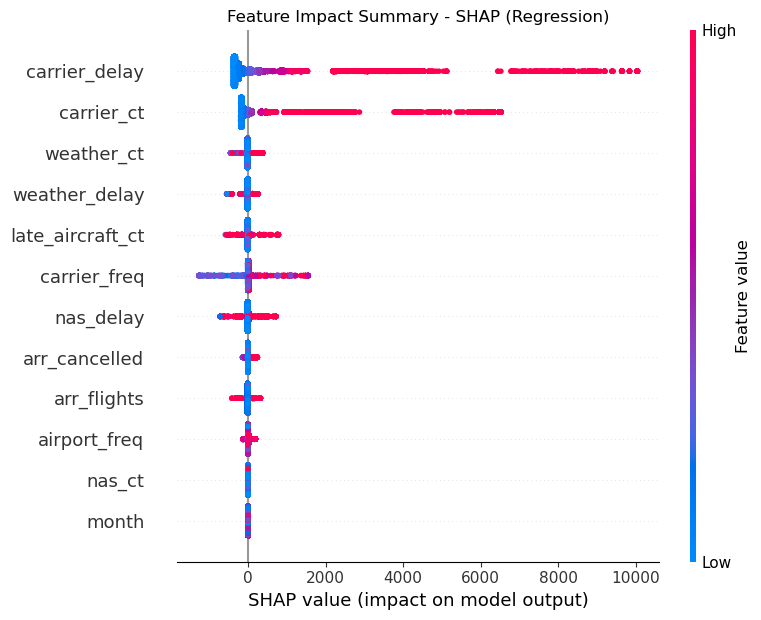

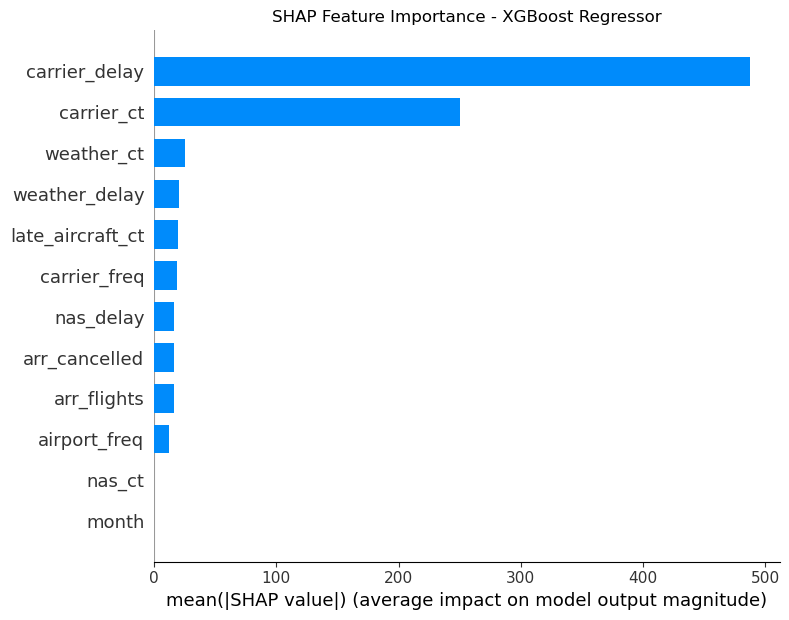

In [119]:
# SHAP Explainability for XGBoost Regression Model
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer using the trained model
explainer = shap.Explainer(xgb_model_reg)

# Generate SHAP values for the test features
shap_vals = explainer(X_test_r)

#  Summary (Bee Swarm) Plot: Highlights feature contributions per sample
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X_test_r, show=False)
plt.title("Feature Impact Summary - SHAP (Regression)")
plt.tight_layout()
plt.show()

# Bar Chart: Average absolute contribution of each feature
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X_test_r, plot_type="bar", show=False)
plt.title("SHAP Feature Importance - XGBoost Regressor")
plt.tight_layout()
plt.show()


In [121]:
def estimate_flight_delay(dataframe, xgb_model_clf, xgb_model_reg):
    """
    Predict delay in minutes for each flight based on classification and regression models.
    If a flight is predicted to be delayed, its expected delay duration is estimated.
    """
    selected_features = [
        'month', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
        'late_aircraft_ct', 'arr_cancelled', 'carrier_delay',
        'weather_delay', 'nas_delay', 'carrier_freq', 'airport_freq'
    ]

    # Step 1: Predict delay status (0 = on time, 1 = delayed)
    delay_flags = xgb_model_clf.predict(dataframe[selected_features])

    # Step 2: For delayed flights, estimate delay duration; else return 0
    delay_estimates = []
    for i, delayed in enumerate(delay_flags):
        if delayed == 1:
            delay_input = dataframe.iloc[[i]][selected_features]
            estimated_minutes = xgb_model_reg.predict(delay_input)[0]
            delay_estimates.append(estimated_minutes)
        else:
            delay_estimates.append(0.0)

    return np.round(delay_estimates, 2)
# To get delay predictions in minutes for new flights:
# Make sure your test DataFrame (e.g., `new_flights_df`) is prepared with the required features.

# Example:
# predictions = estimate_flight_delay(new_flights_df, xgb_model_clf, xgb_model_reg)
# new_flights_df['predicted_delay_minutes'] = predictions
# print(new_flights_df[['predicted_delay_minutes']].head())


In [125]:
test_data = pd.DataFrame({
    'month': [6, 7, 6, 8, 7],
    'arr_flights': [120, 95, 110, 130, 100],
    'carrier_ct': [8, 12, 9, 10, 11],
    'weather_ct': [2, 0, 1, 3, 0],
    'nas_ct': [5, 6, 4, 5, 7],
    'late_aircraft_ct': [7, 8, 6, 9, 10],
    'arr_cancelled': [0, 1, 0, 0, 1],
    'carrier_delay': [15.0, 30.0, 20.0, 25.0, 35.0],
    'weather_delay': [0.0, 10.0, 5.0, 0.0, 15.0],
    'nas_delay': [5.0, 8.0, 6.0, 7.0, 10.0],
    'carrier_freq': [1, 3, 2, 4, 0],
    'airport_freq': [0, 2, 1, 3, 4]
})
predicted_delay_minutes = estimate_flight_delay(test_data, xgb_model, xgb_model_reg)
test_data['predicted_delay_minutes'] = predicted_delay_minutes
print(test_data[['predicted_delay_minutes']])


KeyError: "['carrier_encoded', 'airport_encoded'] not in index"